In [2]:
import cudf
import pandas as pd
import numpy as np

In [3]:
predict_df = cudf.read_parquet('./data/predicttop5.parquet')
predict_df.head()

,predict,label,recipient,buyAsset-list
0,[ 5 4 3 37 14],4,0x000000000004d7463d0f9c77383600bc82d612f5,"[1476, 1017, 714, 503, 1414, 540, 24, 57, 388,..."
1,[ 4 3 5 15 31],4,0x000000000008e4db6a6194c6957df47e30970dc2,"[4, 5, 113, 4, 5, 4, 3, 4, 5, 4, 2, 4]"
2,[3 5 7 4 9],3,0x00000000005dbcb0d0513fcda746382fe8a53468,"[7, 3]"
3,[3 4 5 8 7],252,0x000000000088e0120f9e6652cc058aec07564f69,"[3, 252]"
4,[ 4 3 5 8 16],7,0x0000000000e002b4e3009de1c7614ae5e1facf7a,"[4, 7]"


In [4]:
predict_df_pd  = predict_df.to_pandas()

In [5]:
predict_df_pd.dtypes

predict          object
label             int64
recipient        object
buyAsset-list    object
dtype: object

In [6]:
def custom_compare(x, y):
    y_list = [int(m) for m in y[1:-1].split()]
    return int(x) in y_list

# Apply the custom function to create a new column 'compare_result'
predict_df_pd['compare_result'] = predict_df_pd.apply(lambda row: custom_compare(row['label'], row['predict']), axis=1)

predict_df_pd.head()

,predict,label,recipient,buyAsset-list,compare_result
0,[ 5 4 3 37 14],4,0x000000000004d7463d0f9c77383600bc82d612f5,"[1476, 1017, 714, 503, 1414, 540, 24, 57, 388,...",True
1,[ 4 3 5 15 31],4,0x000000000008e4db6a6194c6957df47e30970dc2,"[4, 5, 113, 4, 5, 4, 3, 4, 5, 4, 2, 4]",True
2,[3 5 7 4 9],3,0x00000000005dbcb0d0513fcda746382fe8a53468,"[7, 3]",True
3,[3 4 5 8 7],252,0x000000000088e0120f9e6652cc058aec07564f69,"[3, 252]",False
4,[ 4 3 5 8 16],7,0x0000000000e002b4e3009de1c7614ae5e1facf7a,"[4, 7]",False


In [7]:
ground_truth = predict_df_pd['label'].value_counts()

# load token category encoding

In [17]:
cate_data = cudf.read_parquet(f"./preprocessWorkflow/categories/unique.buyAsset.parquet")
cate_data_pd = cate_data.to_pandas()
cate_data_pd.index
mapping = cate_data_pd.reset_index()[['index','buyAsset']]
# index2Asset_dict = dict(zip(mapping['index'], mapping['buyAsset']))
# asset2Index_dict = dict(zip(mapping['buyAsset'], mapping['index']))

In [18]:
mapping.rename(columns={'buyAsset': 'merge'}, inplace=True)


In [19]:
mapping.head()

,index,merge
0,3,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48
1,4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2
2,5,0xdac17f958d2ee523a2206206994597c13d831ec7
3,6,0x2b591e99afe9f32eaa6214f7b7629768c40eeb39
4,7,0x6b175474e89094c44da98b954eedeac495271d0f


In [20]:
look_up  = cudf.read_parquet(f"./data/token_lookup/").to_pandas()
look_up.head()

,merge,combined_token_name,combined_token_symbol,token_category,token_rank,risky_flags,bluecheckmark,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,tokenpriceusd
0,0xa50709b10c328772ea24a44b13c7e23c75561ecb,28,28,Payments,Unranked,0,None,"{'combined_token_name': 'Titanium22', 'combine...","{'combined_token_name': 'Sunrise', 'combined_t...","{'combined_token_name': 'TempleDAO', 'combined...","{'combined_token_name': 'GameStop.Finance', 'c...","{'combined_token_name': 'Rake Casino', 'combin...","{'combined_token_name': 'Tail', 'combined_toke...","{'combined_token_name': 'Wall Street Memes', '...","{'combined_token_name': 'BuyMORE', 'combined_t...","{'combined_token_name': 'Big Eyes', 'combined_...","{'combined_token_name': 'SafeBlast', 'combined...",None
1,0xe4efdd2eb216a4620cfa55c5cc67bd09dc64ff24,₿,₿,Payments,Unranked,0,None,"{'combined_token_name': 'Cash Token', 'combine...","{'combined_token_name': 'Neural Protocol', 'co...","{'combined_token_name': 'Bitcoin ETF', 'combin...","{'combined_token_name': 'Magic Internet Cash',...","{'combined_token_name': 'ETH Coin', 'combined_...","{'combined_token_name': 'TON Community', 'comb...",{'combined_token_name': 'Decentralized Crypto ...,{'combined_token_name': 'Digital Financial Exc...,{'combined_token_name': 'The Tokenized Bitcoin...,"{'combined_token_name': 'YOLOCash', 'combined_...",None
2,0x3d2b66bc4f9d6388bd2d97b95b565be1686aefb3,LamboERC,lamboerc,symbolizing the hope for significant profits....,Unranked,https://gopluslabs.io/token-security/1/0x3d2b6...,TRUE,80774,$LAMBO,lambo,"{'combined_token_name': 'Dream', 'combined_tok...","{'combined_token_name': 'WEN Token', 'combined...","{'combined_token_name': 'Baby Shiba Coin', 'co...","{'combined_token_name': 'Wojak 2.69', 'combine...","{'combined_token_name': 'Bull Market', 'combin...","{'combined_token_name': 'Patrick', 'combined_t...","{'combined_token_name': 'MicroPepe', 'combined...",0
3,0x48af7b1c9dac8871c064f62fcec0d9d6f7c269f5,.Alpha,.ALPHA,NFT Creation and Marketplace,Unranked,0,FALSE,"{'combined_token_name': 'Alpha Intelligence', ...","{'combined_token_name': 'Stella', 'combined_to...","{'combined_token_name': 'Alpha Coin', 'combine...","{'combined_token_name': 'Bot Compiler', 'combi...","{'combined_token_name': 'Alpha Token', 'combin...","{'combined_token_name': 'Alpha Shards', 'combi...","{'combined_token_name': 'Alpha Gardeners', 'co...",{'combined_token_name': 'Q DAO Governance toke...,"{'combined_token_name': 'Hackerlabs DAO', 'com...","{'combined_token_name': 'Alpha Impact', 'combi...",0
4,0x4594cffbfc09bc5e7ecf1c2e1c1e24f0f7d29036,0 Knowledge Network,0kn,Privacy and Cybersecurity,Unranked,0,None,"{'combined_token_name': 'Evanesco Network', 'c...","{'combined_token_name': 'Secret', 'combined_to...","{'combined_token_name': 'Oasis Network', 'comb...","{'combined_token_name': 'BlackHat', 'combined_...","{'combined_token_name': 'LTO Network', 'combin...","{'combined_token_name': 'SCRIV', 'combined_tok...",{'combined_token_name': 'Public Index Network'...,"{'combined_token_name': 'ZkTsunami', 'combined...","{'combined_token_name': 'No One', 'combined_to...","{'combined_token_name': 'Sentinel [OLD]', 'com...",None


In [22]:
mapping_merge = pd.merge(mapping, look_up, on='merge', how='left')
mapping_merge.head()

,index,merge,combined_token_name,combined_token_symbol,token_category,token_rank,risky_flags,bluecheckmark,top_1,top_2,top_3,top_4,top_5,top_6,top_7,top_8,top_9,top_10,tokenpriceusd
0,3,0xa0b86991c6218b36c1d19d4a2e9eb0ce3606eb48,USDC,usdc,Stablecoins,#4,0,TRUE,"{'token_name': 'Dai', 'token_symbol': '[DAI]',...","{'token_name': 'TrueUSD', 'token_symbol': '[TU...","{'token_name': 'BUSD', 'token_symbol': '[BUSD]...","{'token_name': 'USDD', 'token_symbol': '[USDD]...","{'token_name': 'Frax', 'token_symbol': '[FRAX]...","{'token_name': 'First Digital USD', 'token_sym...","{'token_name': 'Tether Gold', 'token_symbol': ...","{'token_name': 'PAX Gold', 'token_symbol': '[P...","{'token_name': 'Pax Dollar', 'token_symbol': '...","{'token_name': 'Liquity USD', 'token_symbol': ...",1
1,4,0xc02aaa39b223fe8d0a0e5c4f27ead9083c756cc2,WETH,weth,Crypto Exchanges,Unranked,0,TRUE,"{'combined_token_name': 'WETH yVault', 'combin...",{'combined_token_name': 'Balancer Aave v3 Boos...,"{'combined_token_name': 'Aave AMM WETH', 'comb...",{'combined_token_name': 'Balancer Boosted Aave...,"{'combined_token_name': 'Aave WETH', 'combined...",{'combined_token_name': 'Gitcoin Staked ETH In...,{'combined_token_name': 'Balancer 80 BAL 20 WE...,{'combined_token_name': 'Aave AMM BptWBTCWETH'...,"{'combined_token_name': 'dYdX (wethDYDX)', 'co...",{'combined_token_name': 'f(x) Protocol Fractio...,"1,799.40"
2,5,0xdac17f958d2ee523a2206206994597c13d831ec7,Tether,usdt,Stablecoins,#2,1,TRUE,"{'token_name': 'USDC', 'token_symbol': '[USDC]...","{'token_name': 'Dai', 'token_symbol': '[DAI]',...","{'token_name': 'TrueUSD', 'token_symbol': '[TU...","{'token_name': 'BUSD', 'token_symbol': '[BUSD]...","{'token_name': 'USDD', 'token_symbol': '[USDD]...","{'token_name': 'Frax', 'token_symbol': '[FRAX]...","{'token_name': 'First Digital USD', 'token_sym...","{'token_name': 'Tether Gold', 'token_symbol': ...","{'token_name': 'PAX Gold', 'token_symbol': '[P...","{'token_name': 'Pax Dollar', 'token_symbol': '...",1
3,6,0x2b591e99afe9f32eaa6214f7b7629768c40eeb39,HEX,hex,Staking,#20,0,TRUE,"{'token_name': 'Wrapped Beacon ETH', 'token_sy...","{'token_name': 'Lido DAO', 'token_symbol': '[L...","{'token_name': 'Rocket Pool', 'token_symbol': ...","{'token_name': 'cETH', 'token_symbol': '[CETH]...","{'token_name': 'Blox', 'token_symbol': '[CDT]'...","{'token_name': 'Lido Staked Ether', 'token_sym...","{'token_name': 'Ankr Staked ETH', 'token_symbo...","{'token_name': 'Gomining Token', 'token_symbol...","{'token_name': 'Marinade Staked SOL', 'token_s...","{'token_name': 'Stader', 'token_symbol': '[SD]...",0.01
4,7,0x6b175474e89094c44da98b954eedeac495271d0f,Dai,dai,Stablecoins,#10,0,TRUE,"{'token_name': 'TrueUSD', 'token_symbol': '[TU...","{'token_name': 'BUSD', 'token_symbol': '[BUSD]...","{'token_name': 'USDD', 'token_symbol': '[USDD]...","{'token_name': 'Frax', 'token_symbol': '[FRAX]...","{'token_name': 'First Digital USD', 'token_sym...","{'token_name': 'Tether Gold', 'token_symbol': ...","{'token_name': 'PAX Gold', 'token_symbol': '[P...","{'token_name': 'Pax Dollar', 'token_symbol': '...","{'token_name': 'Liquity USD', 'token_symbol': ...","{'token_name': 'cUSDT', 'token_symbol': '[CUSD...",1


In [24]:
mapping_merge.rename(columns={'index': 'label'}, inplace=True)
mapping_merge.to_csv('./data/indexed_lookup.csv')

In [25]:
predict_df_pd[['label','compare_result']].to_csv('./data/label.csv')

# Visualize result

In [10]:

import numpy as np
import matplotlib.pyplot as plt 

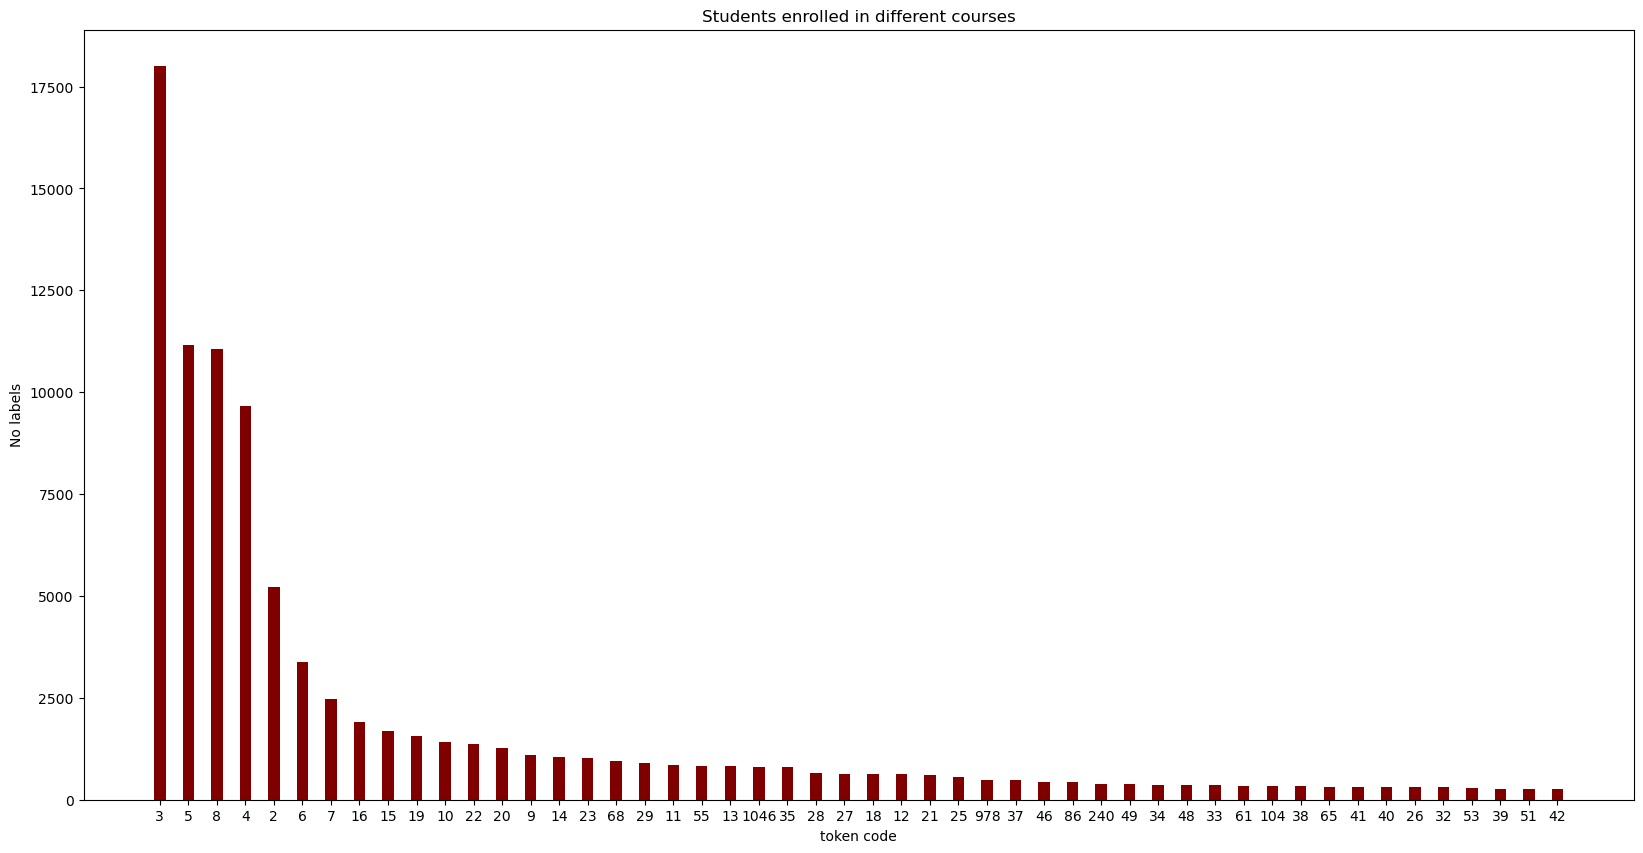

In [23]:

courses = [str(x) for x in ground_truth[:50].keys()]
values = list(ground_truth[:50].values)
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("token code")
plt.ylabel("No labels")
plt.title("Students enrolled in different courses")
plt.show()

In [26]:
def split(y):
    return y[1:-1].split()

# Apply the custom function to create a new column 'compare_result'
predict_df_pd['split_predict'] = predict_df_pd.apply(lambda row: split(row['predict']), axis=1)

predict_df_pd.head()

,predict,label,recipient,buyAsset-list,compare_result,split_predict
0,[ 5 4 3 37 14],4,0x000000000004d7463d0f9c77383600bc82d612f5,"[1476, 1017, 714, 503, 1414, 540, 24, 57, 388,...",True,"[5, 4, 3, 37, 14]"
1,[ 4 3 5 15 31],4,0x000000000008e4db6a6194c6957df47e30970dc2,"[4, 5, 113, 4, 5, 4, 3, 4, 5, 4, 2, 4]",True,"[4, 3, 5, 15, 31]"
2,[3 5 7 4 9],3,0x00000000005dbcb0d0513fcda746382fe8a53468,"[7, 3]",True,"[3, 5, 7, 4, 9]"
3,[3 4 5 8 7],252,0x000000000088e0120f9e6652cc058aec07564f69,"[3, 252]",False,"[3, 4, 5, 8, 7]"
4,[ 4 3 5 8 16],7,0x0000000000e002b4e3009de1c7614ae5e1facf7a,"[4, 7]",False,"[4, 3, 5, 8, 16]"


In [27]:
top = [np.array(x) for x in predict_df_pd['split_predict'].values]

In [28]:
top = np.array(top).reshape(-1)

In [29]:
df_temp = pd.DataFrame(top, columns=['pre'])
# data = df_temp['pre'].value_counts()

In [31]:
df_temp.to_csv('./data/predicted_top5.csv')

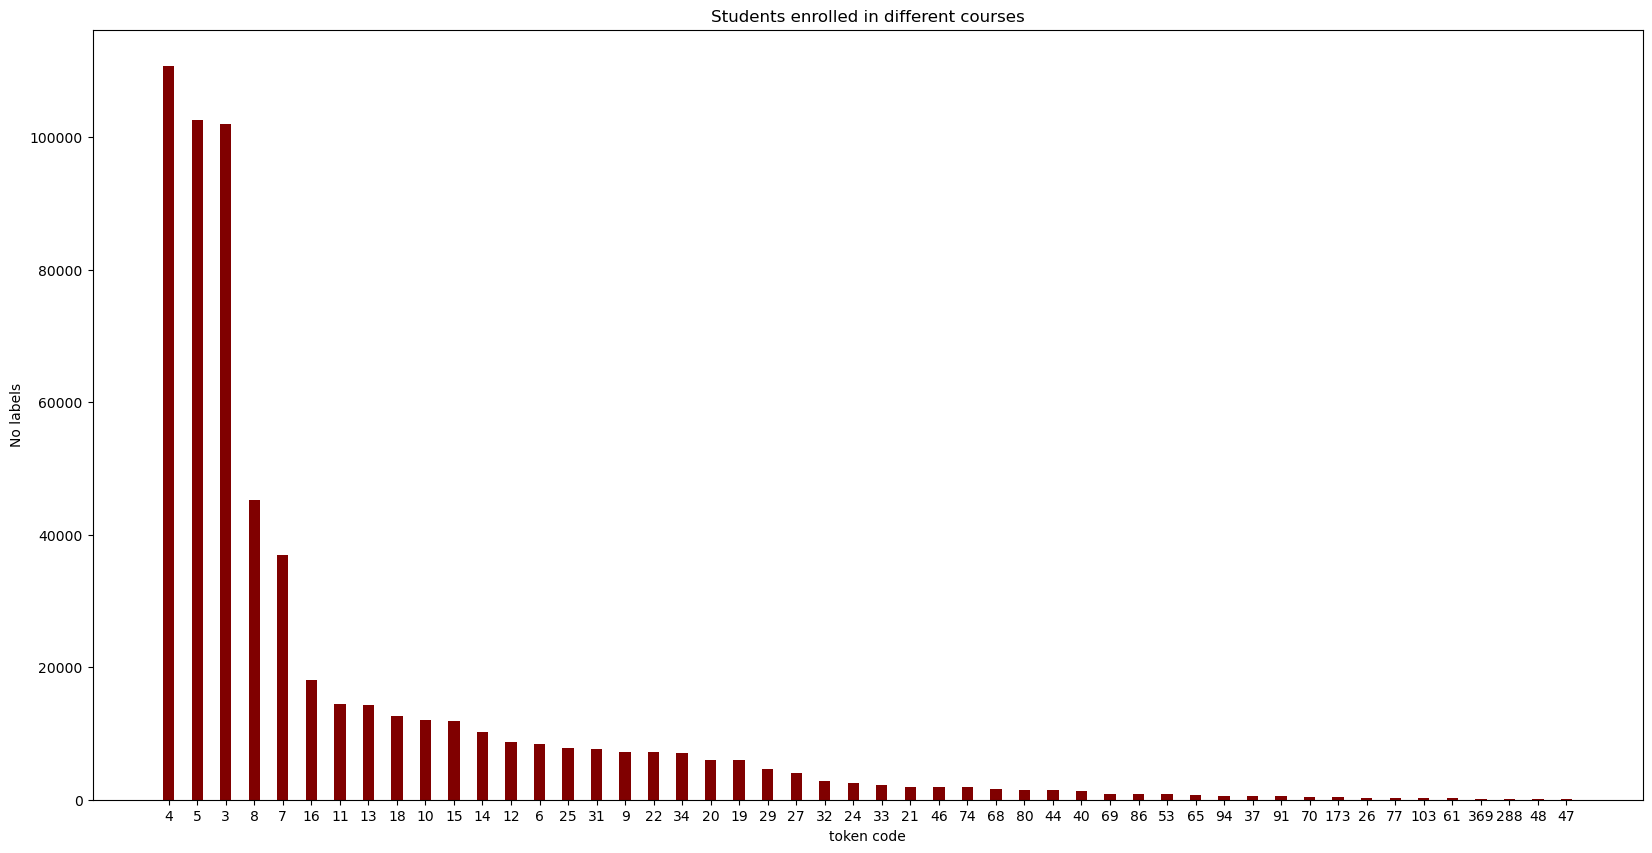

In [37]:
data = data[:50]

courses = [str(x) for x in data.keys()]
values = list(data.values)
  
fig = plt.figure(figsize = (20, 10))
 
# creating the bar plot
plt.bar(courses, values, color ='maroon', 
        width = 0.4)
 
plt.xlabel("token code")
plt.ylabel("No labels")
plt.title("Students enrolled in different courses")
plt.show()